**-B·ªô d·ªØ li·ªáu Housing Prices Dataset do M Yasser H chia s·∫ª tr√™n Kaggle l√† m·ªôt t·∫≠p d·ªØ li·ªáu nh·ªè g·ªçn, l√Ω t∆∞·ªüng cho vi·ªác h·ªçc v√† th·ª±c h√†nh c√°c k·ªπ thu·∫≠t ph√¢n t√≠ch d·ªØ li·ªáu, ƒë·∫∑c bi·ªát l√† d·ª± ƒëo√°n gi√° nh√† th√¥ng qua c√°c m√¥ h√¨nh h·ªìi quy.**

-T·ªïng quan v·ªÅ d·ªØ li·ªáu
T√™n: Housing Prices Dataset

Ngu·ªìn: Kaggle - Housing Prices Dataset
Lo·∫°i b√†i to√°n: H·ªìi quy (Regression)
ƒê·ªãnh d·∫°ng: CSV

=> M·ª•c ti√™u: D·ª± ƒëo√°n gi√° nh√† d·ª±a tr√™n c√°c ƒë·∫∑c tr∆∞ng nh∆∞ di·ªán t√≠ch, s·ªë ph√≤ng ng·ªß, t√¨nh tr·∫°ng n·ªôi th·∫•t, v·ªã tr√≠ g·∫ßn ƒë∆∞·ªùng ch√≠nh, v.v..

-M√¥ t·∫£ c√°c ƒë·∫∑c tr∆∞ng ch√≠nh
D·ªØ li·ªáu bao g·ªìm c√°c c·ªôt sau:

* price: Gi√° nh√† (bi·∫øn m·ª•c ti√™u)
* area: Di·ªán t√≠ch nh√†
* bedrooms: S·ªë ph√≤ng ng·ªß
* bathrooms: S·ªë ph√≤ng t·∫Øm
* stories: S·ªë t·∫ßng
* mainroad: Nh√† c√≥ n·∫±m g·∫ßn ƒë∆∞·ªùng ch√≠nh kh√¥ng (yes/no)
* guestroom: C√≥ ph√≤ng kh√°ch kh√¥ng (yes/no)
* basement: C√≥ t·∫ßng h·∫ßm kh√¥ng (yes/no)
* hotwaterheating: C√≥ h·ªá th·ªëng n∆∞·ªõc n√≥ng kh√¥ng (yes/no)
* airconditioning: C√≥ ƒëi·ªÅu h√≤a kh√¥ng kh√≠ kh√¥ng (yes/no)
* parking: S·ªë ch·ªó ƒë·∫≠u xe
* prefarea: Nh√† c√≥ n·∫±m trong khu v·ª±c ∆∞u ti√™n kh√¥ng (yes/no)

In [1]:
import math
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import scipy.stats as stats
from tabulate import tabulate
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
housing = pd.read_csv("/kaggle/input/housng-dataset/Housing.csv")
df=housing

In [4]:
df.describe().T

count          mean           std        min        25%        50%  \
price      545.0  4.766729e+06  1.870440e+06  1750000.0  3430000.0  4340000.0   
area       545.0  5.150541e+03  2.170141e+03     1650.0     3600.0     4600.0   
bedrooms   545.0  2.965138e+00  7.380639e-01        1.0        2.0        3.0   
bathrooms  545.0  1.286239e+00  5.024696e-01        1.0        1.0        1.0   
stories    545.0  1.805505e+00  8.674925e-01        1.0        1.0        2.0   
parking    545.0  6.935780e-01  8.615858e-01        0.0        0.0        0.0   

                 75%         max  
price      5740000.0  13300000.0  
area          6360.0     16200.0  
bedrooms         3.0         6.0  
bathrooms        2.0         4.0  
stories          2.0         4.0  
parking          1.0         3.0

In [5]:
summary = {
    "Th√¥ng tin": [
        "S·ªë l∆∞·ª£ng b·∫£n ghi (d√≤ng)",
        "S·ªë l∆∞·ª£ng bi·∫øn (c·ªôt)",
        "S·ªë d√≤ng b·ªã tr√πng l·∫∑p ho√†n to√†n",
        "T·ªïng s·ªë gi√° tr·ªã b·ªã thi·∫øu (missing values)"
    ],
    "Gi√° tr·ªã": [
        len(df),
        df.shape[1],
        df.duplicated().sum(),
        df.isnull().sum().sum()  # T·ªïng s·ªë √¥ b·ªã missing
    ]
}

summary_df = pd.DataFrame(summary)

print("\nB·∫¢NG T√ìM T·∫ÆT TH√îNG TIN D·ªÆ LI·ªÜU")
print(tabulate(summary_df, headers='keys', tablefmt='fancy_grid', showindex=False))


B·∫¢NG T√ìM T·∫ÆT TH√îNG TIN D·ªÆ LI·ªÜU
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Th√¥ng tin                                 ‚îÇ   Gi√° tr·ªã ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ S·ªë l∆∞·ª£ng b·∫£n ghi (d√≤ng)                   ‚îÇ       545 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ S·ªë l∆∞·ª£ng bi·∫øn (c·ªôt)                       ‚îÇ        13 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ S·ªë d√≤ng b·ªã tr√πng l·∫∑p ho√†n to√†n            ‚

In [6]:
column_info = pd.DataFrame({
    "T√™n c·ªôt": df.columns,
    "Ki·ªÉu d·ªØ li·ªáu": df.dtypes.values,
    "S·ªë gi√° tr·ªã kh√¥ng null": df.notnull().sum().values,
    "S·ªë gi√° tr·ªã null": df.isnull().sum().values,
    "T·ª∑ l·ªá thi·∫øu (%)": (df.isnull().sum().values / len(df) * 100).round(2)
})

print("\nB·∫¢NG CHI TI·∫æT C√ÅC BI·∫æN TRONG T·∫¨P D·ªÆ LI·ªÜU")
print(tabulate(column_info, headers='keys', tablefmt='fancy_grid', showindex=False))


B·∫¢NG CHI TI·∫æT C√ÅC BI·∫æN TRONG T·∫¨P D·ªÆ LI·ªÜU
‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ T√™n c·ªôt          ‚îÇ Ki·ªÉu d·ªØ li·ªáu   ‚îÇ   S·ªë gi√° tr·ªã kh√¥ng null ‚îÇ   S·ªë gi√° tr·ªã null ‚îÇ   T·ª∑ l·ªá thi·∫øu (%) ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ price            ‚îÇ int64          ‚îÇ                     545 ‚îÇ                 0 ‚îÇ                 0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚

**Nh·∫≠n x√©t:** T·ª´ thu th√¥ng tin t·ª´ b·∫£ng tr√™n ta th·∫•y d·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c x·ª≠ l√Ω t·ªët t·ª´ giai ƒëo·∫°n thu th·∫≠p, khi kh√¥ng t·ªìn t·∫°i c√°c gi√° tr·ªã b·ªã thi·∫øu hay c√°c d√≤ng b·ªã tr√πng l·∫∑p. Nh·ªù ƒë√≥, c√°c ph√¢n t√≠ch th·ªëng k√™ sau n√†y c√≥ th·ªÉ ƒë∆∞·ª£c ti·∫øn h√†nh m·ªôt c√°ch hi·ªáu qu·∫£ v√† ƒë√°ng tin c·∫≠y. ƒêi·ªÅu n√†y gi√∫p ƒë·∫£m b·∫£o r·∫±ng m·ªçi k·∫øt qu·∫£ thu ƒë∆∞·ª£c ƒë·ªÅu ph·∫£n √°nh ch√≠nh x√°c m·ªëi li√™n h·ªá gi·ªØa c√°c bi·∫øn. 

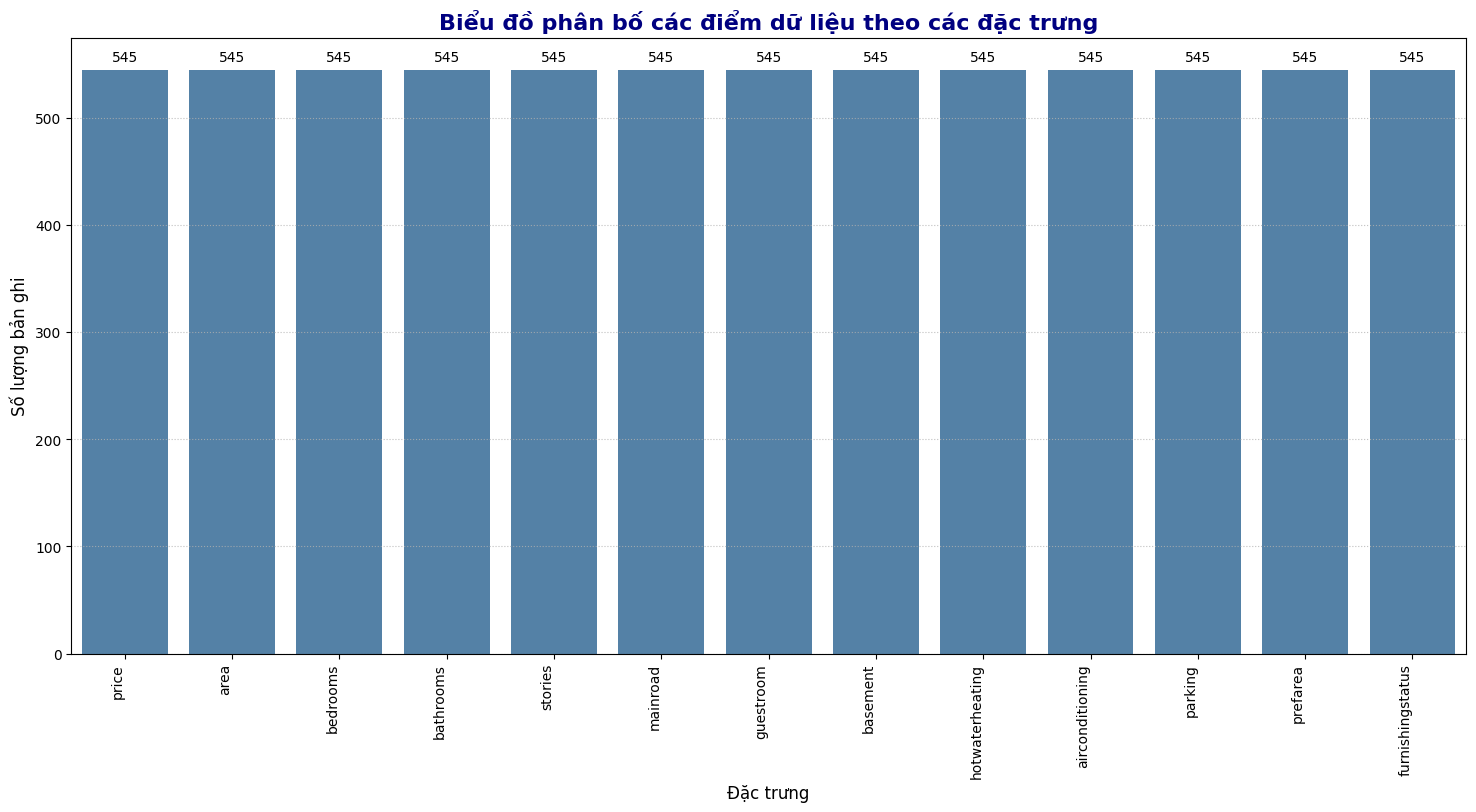

In [7]:
num_of_record = df.shape[0]
non_missing_counts = df.notna().sum()

plt.figure(figsize=(18, 8))
colors = ['steelblue' if value == num_of_record else 'lightskyblue' for value in non_missing_counts.values]

sns.barplot(x=non_missing_counts.index, y=non_missing_counts.values, palette=colors)

for index, value in enumerate(non_missing_counts.values):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.title("Bi·ªÉu ƒë·ªì ph√¢n b·ªë c√°c ƒëi·ªÉm d·ªØ li·ªáu theo c√°c ƒë·∫∑c tr∆∞ng", fontsize=16, weight='bold', color="navy")
plt.xlabel("ƒê·∫∑c tr∆∞ng", fontsize=12)
plt.ylabel("S·ªë l∆∞·ª£ng b·∫£n ghi", fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.ylim(0, df.shape[0] + 30)

plt.grid(axis='y', linestyle=':', alpha=0.8)
plt.show()

- Qua quan s√°t bi·ªÉu ƒë·ªì, nh·∫≠n th·∫•y t·∫≠p d·ªØ li·ªáu kh√¥ng xu·∫•t hi·ªán gi√° tr·ªã b·ªã thi·∫øu. Tuy nhi√™n, trong th·ª±c t·∫ø, vi·ªác xu·∫•t hi·ªán d·ªØ li·ªáu thi·∫øu l√† t√¨nh hu·ªëng kh√° ph·ªï bi·∫øn v√† c·∫ßn ƒë∆∞·ª£c x·ª≠ l√Ω ph√π h·ª£p ƒë·ªÉ ƒë·∫£m b·∫£o t√≠nh to√†n v·∫πn v√† ƒë·ªô tin c·∫≠y c·ªßa ph√¢n t√≠ch.

- Trong tr∆∞·ªùng h·ª£p xu·∫•t hi·ªán gi√° tr·ªã thi·∫øu, c√≥ th·ªÉ √°p d·ª•ng m·ªôt s·ªë ph∆∞∆°ng ph√°p x·ª≠ l√Ω ph·ªï bi·∫øn nh∆∞ sau:

    - **Lo·∫°i b·ªè:** √Åp d·ª•ng khi t·ª∑ l·ªá gi√° tr·ªã thi·∫øu nh·ªè (th√¥ng th∆∞·ªùng l√† d∆∞·ªõi **5%**) v√† kh√¥ng ·∫£nh h∆∞·ªüng ƒë√°ng k·ªÉ ƒë·∫øn k·∫øt qu·∫£ ph√¢n t√≠ch. 

    - **Thay th·∫ø b·∫±ng gi√° tr·ªã ƒë·∫∑c tr∆∞ng:** ƒê·ªëi v·ªõi d·ªØ li·ªáu ƒë·ªãnh l∆∞·ª£ng, c√≥ th·ªÉ thay th·∫ø b·∫±ng gi√° tr·ªã mean, median ho·∫∑c mode. ƒê·ªëi v·ªõi d·ªØ li·ªáu ƒë·ªãnh t√≠nh, n√™n thay th·∫ø b·∫±ng gi√° tr·ªã xu·∫•t hi·ªán v·ªõi t·∫ßn su·∫•t cao nh·∫•t.

    - **N·ªôi suy**: Ph√π h·ª£p v·ªõi chu·ªói th·ªùi gian, s·ª≠ d·ª•ng xu h∆∞·ªõng d·ªØ li·ªáu ƒë·ªÉ d·ª± ƒëo√°n gi√° tr·ªã b·ªã thi·∫øu.

    - **M√¥ h√¨nh h√≥a ho·∫∑c h·ªçc m√°y:** S·ª≠ d·ª•ng c√°c m√¥ h√¨nh nh∆∞ h·ªìi quy tuy·∫øn t√≠nh, k-NN ho·∫∑c c√°c thu·∫≠t to√°n h·ªçc m√°y kh√°c ƒë·ªÉ d·ª± ƒëo√°n v√† ƒëi·ªÅn gi√° tr·ªã thi·∫øu d·ª±a tr√™n c√°c bi·∫øn li√™n quan.

Vi·ªác l·ª±a ch·ªçn ph∆∞∆°ng ph√°p x·ª≠ l√Ω ph·ª• thu·ªôc v√†o ƒë·∫∑c ƒëi·ªÉm c·ªßa d·ªØ li·ªáu v√† m·ª•c ti√™u ph√¢n t√≠ch, nh·∫±m ƒë·∫£m b·∫£o t√≠nh ch√≠nh x√°c v√† kh√°ch quan trong k·∫øt qu·∫£ cu·ªëi c√πng.

In [8]:
duplicates = df[df.duplicated()]
print("S·ªë d√≤ng b·ªã tr√πng l·∫∑p ho√†n to√†n:", duplicates.shape[0])

S·ªë d√≤ng b·ªã tr√πng l·∫∑p ho√†n to√†n: 0


- Quan s√°t cho th·∫•y t·∫≠p d·ªØ li·ªáu hi·ªán t·∫°i kh√¥ng c√≥ c√°c ƒëi·ªÉm d·ªØ li·ªáu b·ªã tr√πng l·∫∑p ho√†n to√†n. Tuy nhi√™n, trong th·ª±c t·∫ø, vi·ªác xu·∫•t hi·ªán c√°c d√≤ng d·ªØ li·ªáu tr√πng l·∫∑p l√† t√¨nh hu·ªëng ph·ªï bi·∫øn, ƒë·∫∑c bi·ªát khi d·ªØ li·ªáu ƒë∆∞·ª£c t·ªïng h·ª£p t·ª´ nhi·ªÅu ngu·ªìn ho·∫∑c trong qu√° tr√¨nh nh·∫≠p li·ªáu th·ªß c√¥ng. D·ªØ li·ªáu tr√πng l·∫∑p n·∫øu kh√¥ng ƒë∆∞·ª£c x·ª≠ l√Ω c√≥ th·ªÉ l√†m sai l·ªách k·∫øt qu·∫£ ph√¢n t√≠ch, g√¢y ra d∆∞ th·ª´a ho·∫∑c thi√™n l·ªách trong th·ªëng k√™.

- ƒê·ªÉ x·ª≠ l√Ω, c√≥ th·ªÉ √°p d·ª•ng m·ªôt s·ªë ph∆∞∆°ng ph√°p nh∆∞ sau:

    - **Lo·∫°i b·ªè ho√†n to√†n c√°c d√≤ng b·ªã tr√πng l·∫∑p:** ƒê√¢y l√† c√°ch ƒë∆°n gi·∫£n nh·∫•t khi d·ªØ li·ªáu tr√πng l√† d∆∞ th·ª´a v√† kh√¥ng c·∫ßn gi·ªØ l·∫°i.

    - **Gi·ªØ l·∫°i m·ªôt b·∫£n duy nh·∫•t:** √Åp d·ª•ng khi th√¥ng tin c√°c d√≤ng gi·ªëng nhau ho√†n to√†n, ch·ªâ c·∫ßn gi·ªØ b·∫£n ƒë·∫ßu ti√™n ho·∫∑c cu·ªëi c√πng.

    - **Ki·ªÉm tra tr√πng l·∫∑p theo t·ª´ng c·ªôt ho·∫∑c nh√≥m c·ªôt:** Trong tr∆∞·ªùng h·ª£p c√°c d√≤ng kh√¥ng gi·ªëng ho√†n to√†n nh∆∞ng c√≥ m·ªôt s·ªë tr∆∞·ªùng b·ªã tr√πng, c·∫ßn x√°c ƒë·ªãnh r√µ ti√™u ch√≠ ƒë·ªÉ l√†m s·∫°ch ph√π h·ª£p.

Vi·ªác ph√°t hi·ªán v√† x·ª≠ l√Ω d·ªØ li·ªáu tr√πng l·∫∑p l√† b∆∞·ªõc quan tr·ªçng trong qu√° tr√¨nh ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu, nh·∫±m ƒë·∫£m b·∫£o ƒë·ªô ch√≠nh x√°c v√† ƒë·ªô tin c·∫≠y cho c√°c ph√¢n t√≠ch sau n√†y

## D·ªØ li·ªáu ƒë·ªãnh l∆∞·ª£ng

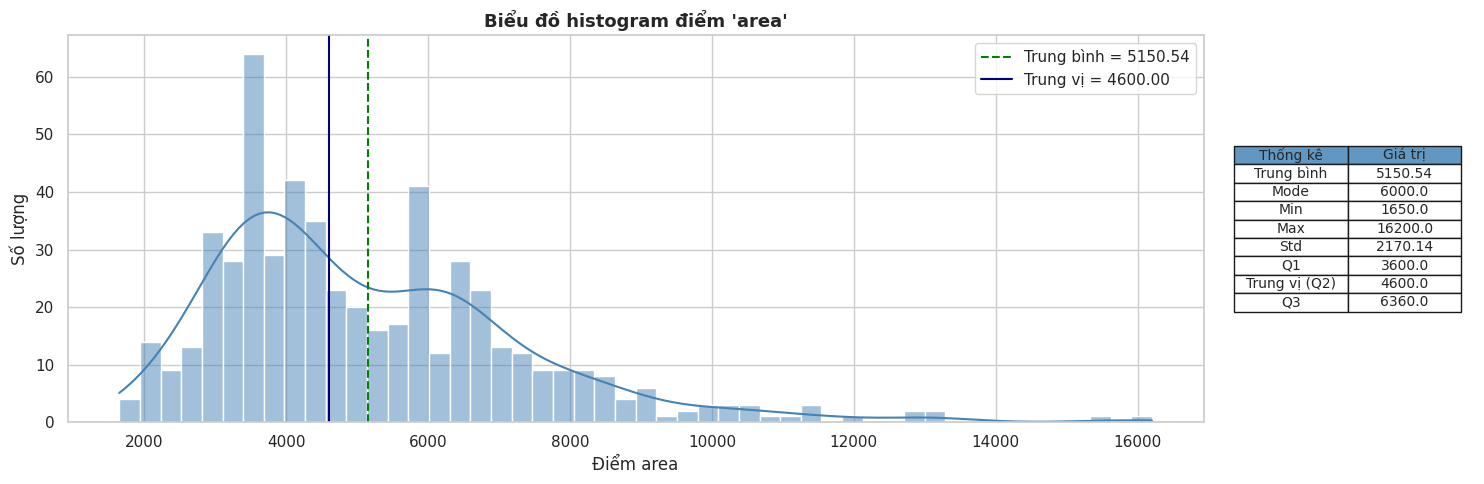

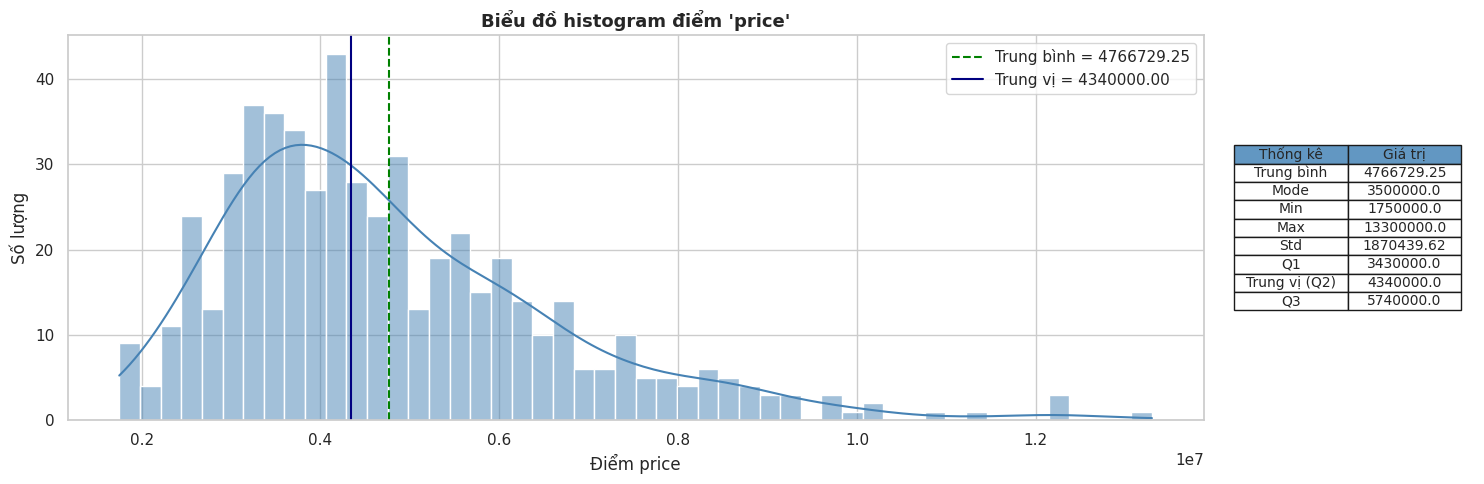

In [9]:
sns.set(style="whitegrid")
scores  = ['area', 'price']

for score in scores :
    data = df[score].dropna()
    mean_val = data.mean()
    median_val = data.median()
    mode_val = data.mode().values[0] if not data.mode().empty else None
    min_val = data.min()
    max_val = data.max()
    std_val = data.std()
    q1 = data.quantile(0.25)
    q2 = data.quantile(0.50)
    q3 = data.quantile(0.75)
    
    stat_table = pd.DataFrame({
        'Th·ªëng k√™': ['Trung b√¨nh','Mode', 'Min', 'Max', 'Std', 'Q1', 'Trung v·ªã (Q2)',  'Q3'],
        'Gi√° tr·ªã': [round(mean_val,2), mode_val, min_val, max_val, round(std_val,2), round(q1,2),round(q2,2), round(q3,2)]
    })

    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[9, 2])

    # Histogram
    ax0 = plt.subplot(gs[0])
    sns.histplot(data=df, x=score, bins=50, stat='count', kde=True, color='steelblue', ax=ax0)
    ax0.axvline(mean_val, color='green', linestyle='--', label=f'Trung b√¨nh = {mean_val:.2f}')
    ax0.axvline(median_val, color='navy', linestyle='-', label=f'Trung v·ªã = {median_val:.2f}')
    ax0.set_title(f"Bi·ªÉu ƒë·ªì histogram ƒëi·ªÉm '{score}'", fontsize=13, weight='bold')
    ax0.set_xlabel(f"ƒêi·ªÉm {score}")
    ax0.set_ylabel("S·ªë l∆∞·ª£ng")
    ax0.legend()

    # B·∫£ng th·ªëng k√™
    ax1 = plt.subplot(gs[1])
    ax1.axis('off')
    table_plot = ax1.table(cellText=stat_table.values,
                           colLabels=stat_table.columns,
                           cellLoc='center',
                           loc='center',
                           colColours=["#6297C2", "#6297C2"])
    table_plot.auto_set_font_size(False)
    table_plot.set_fontsize(10)
    table_plot.scale(0.9, 1.1)

    plt.tight_layout()
    plt.show()


Ta th·∫•y d·ªØ li·ªáu area v√† price ƒë·ªÅu l·ªách ph·∫£i, t·ª©c l√† ph·∫ßn l·ªõn gi√° tr·ªã t·∫≠p trung ·ªü m·ª©c th·∫•p, v√† c√≥ m·ªôt s·ªë gi√° tr·ªã r·∫•t cao k√©o ƒëu√¥i bi·ªÉu ƒë·ªì d√†i ra.
Vi·ªác tr·ª±c quan h√≥a b·∫±ng histogram cho ph√©p x√°c ƒë·ªãnh r·∫±ng d·ªØ li·ªáu ch∆∞a ph√¢n ph·ªëi chu·∫©n

**L√Ω do s·ª≠ d·ª•ng Histogram:**
Histogram kh√¥ng ch·ªâ l√† bi·ªÉu ƒë·ªì hi·ªÉn th·ªã "t·∫ßn su·∫•t", m√† c√≤n l√† c√¥ng c·ª• then ch·ªët gi√∫p ƒë∆∞a ra quy·∫øt ƒë·ªãnh trong c√°c b∆∞·ªõc x·ª≠ l√Ω d·ªØ li·ªáu ti·∫øp theo.
Trong d·ª± √°n nh∆∞ ph√¢n t√≠ch gi√° nh√†, bi·ªÉu ƒë·ªì n√†y gi√∫p hi·ªÉu ƒë∆∞·ª£c m·ª©c ph·ªï bi·∫øn c·ªßa di·ªán t√≠ch v√† gi√°, t·ª´ ƒë√≥ ph√¢n nh√≥m kh√°ch h√†ng, ph√°t hi·ªán b·∫•t th∆∞·ªùng ho·∫∑c x√°c ƒë·ªãnh nhu c·∫ßu th·ªã tr∆∞·ªùng.

## D·ªØ li·ªáu ƒë·ªãnh t√≠nh

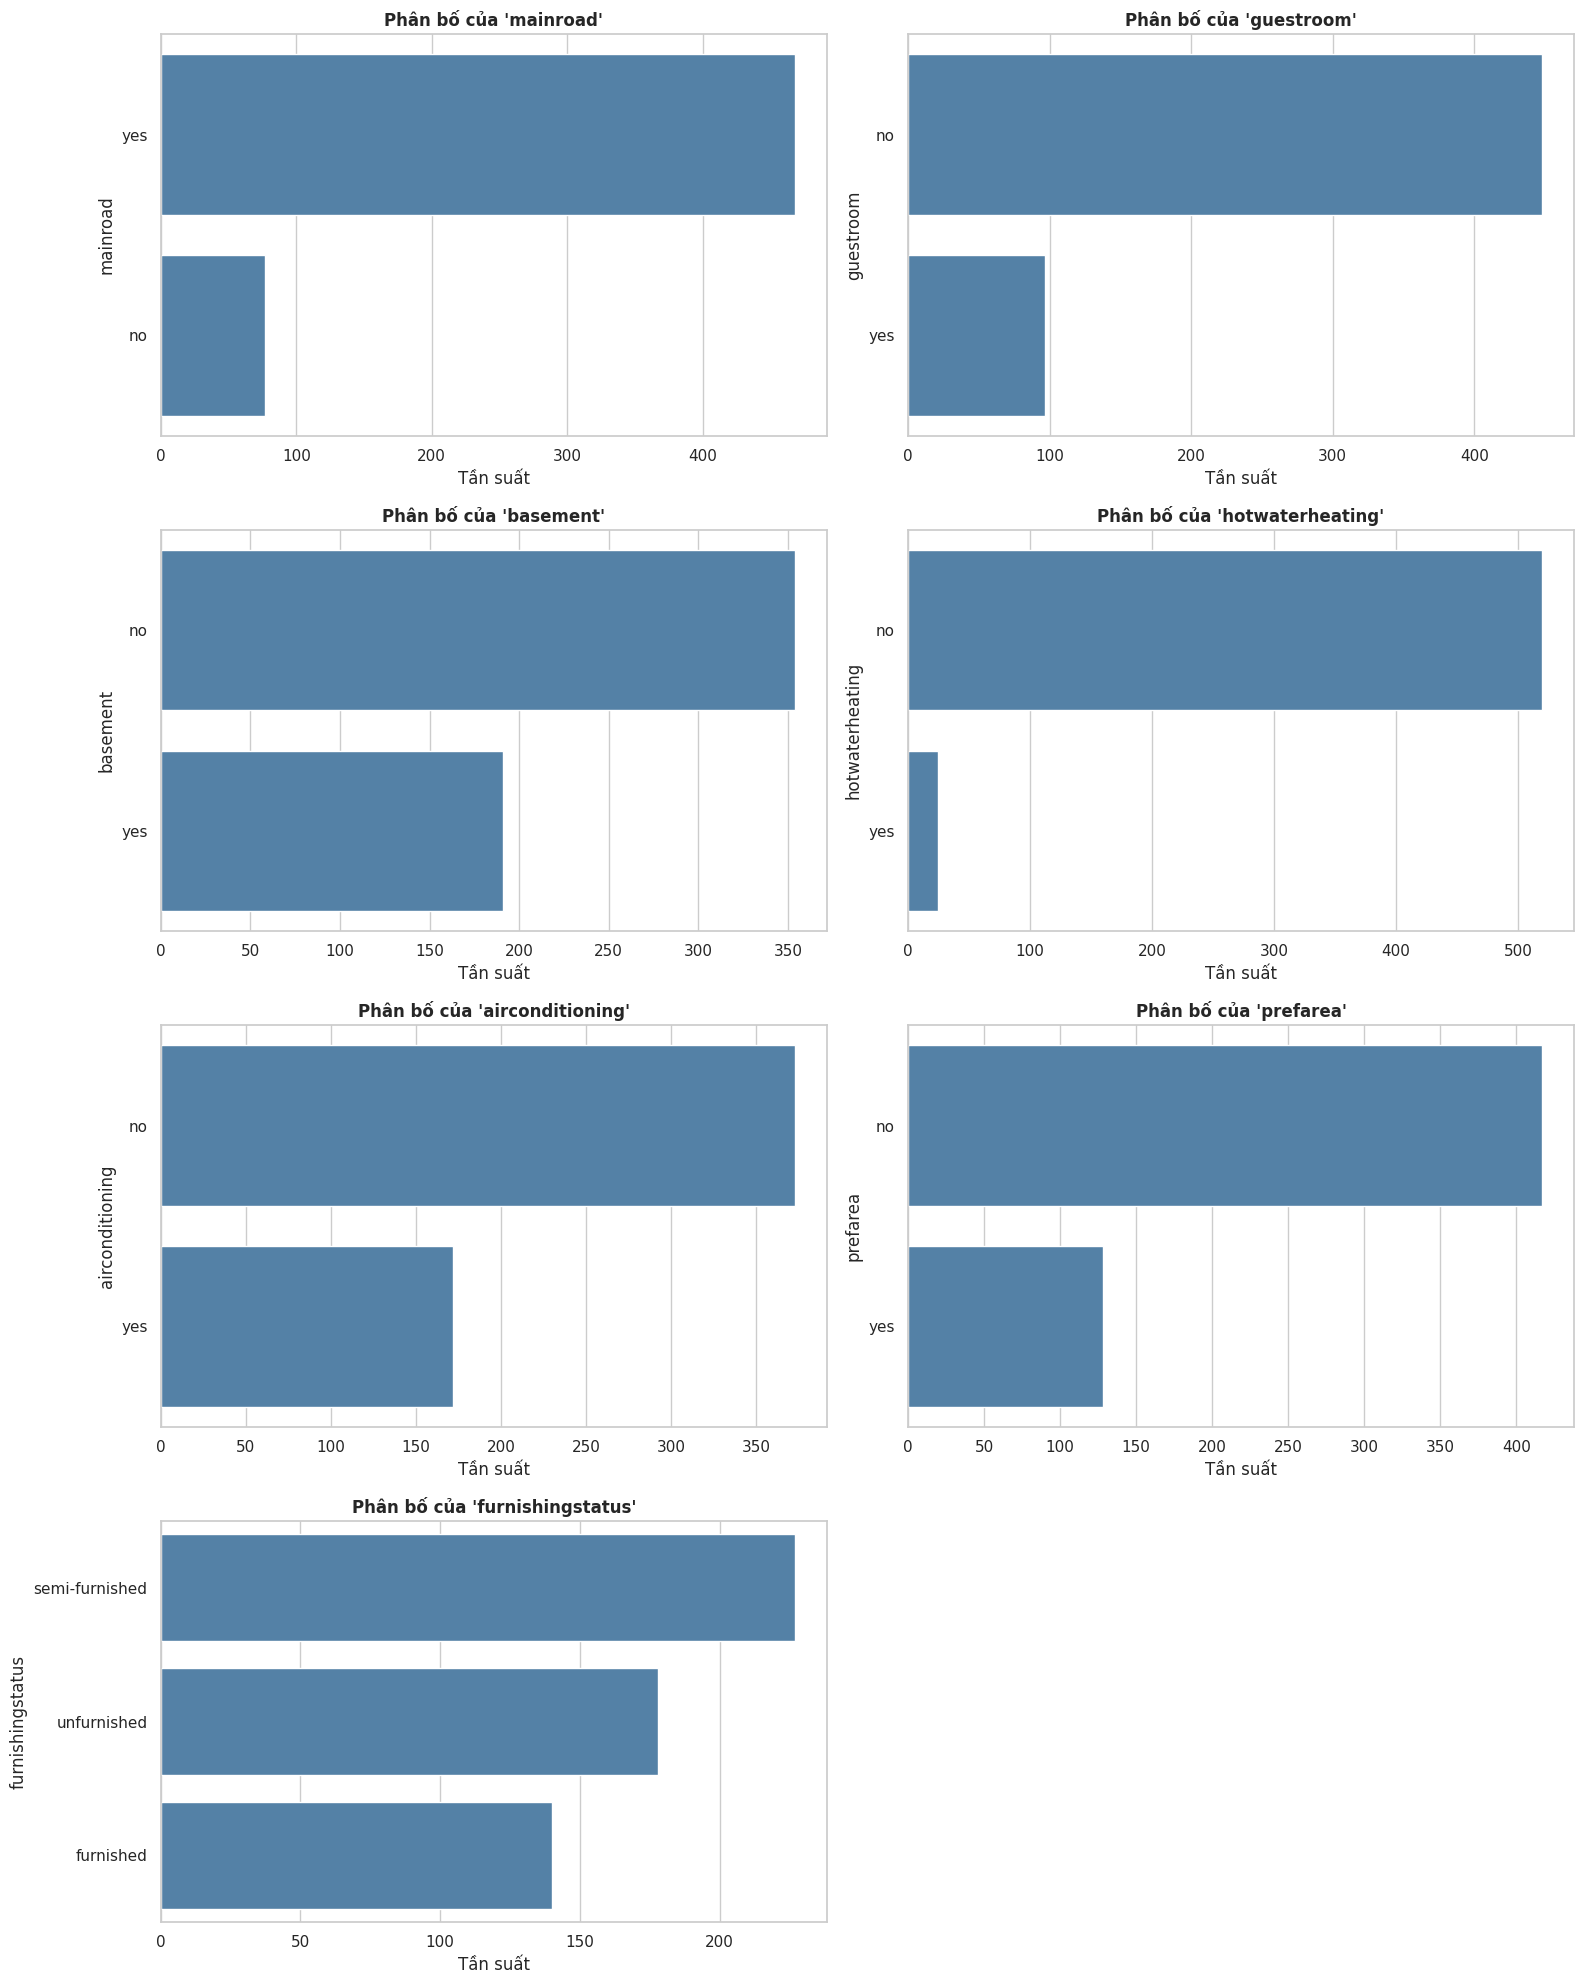

In [10]:
sns.set(style="whitegrid")

cat_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()


n = len(cat_columns)
cols = 2
rows = (n + 1) // cols

plt.figure(figsize=(16, rows * 5))

for i, attribute in enumerate(cat_columns):
    plt.subplot(rows, cols, i + 1)
    order = df[attribute].value_counts().index
    sns.countplot(data=df, y=attribute, order=order, color='steelblue')

    plt.title(f"Ph√¢n b·ªë c·ªßa '{attribute}'", fontsize=12, weight='bold')
    plt.xlabel("T·∫ßn su·∫•t")
    plt.ylabel(attribute)

plt.tight_layout()
plt.show()

**L√Ω do s·ª≠ d·ª•ng countplot v·ªõi d·ªØ li·ªáu n√†y:**
Bi·ªÉu ƒë·ªì countplot c·ªßa Seaborn ƒë∆∞·ª£c d√πng ƒë·ªÉ ƒë·∫øm s·ªë l∆∞·ª£ng c√°c gi√° tr·ªã duy nh·∫•t trong m·ªôt c·ªôt d·∫°ng ph√¢n lo·∫°i (object ho·∫∑c category) v√† hi·ªÉn th·ªã tr·ª±c quan d∆∞·ªõi d·∫°ng c·ªôt ho·∫∑c thanh (bar).

**Hi·ªÉu r√µ ph√¢n b·ªë d·ªØ li·ªáu:**
* V√≠ d·ª•: mainroad c√≥ bao nhi√™u cƒÉn nh√† n·∫±m tr√™n ƒë∆∞·ªùng ch√≠nh (yes) v√† bao nhi√™u kh√¥ng (no).
* ƒêi·ªÅu n√†y gi√∫p b·∫°n ƒë√°nh gi√° m·ª©c ƒë·ªô m·∫•t c√¢n b·∫±ng (imbalance) trong d·ªØ li·ªáu.

**Ph√°t hi·ªán gi√° tr·ªã hi·∫øm ho·∫∑c b·∫•t th∆∞·ªùng:**
* V√≠ d·ª•: N·∫øu c√≥ r·∫•t √≠t d√≤ng v·ªõi guestroom = yes, b·∫°n c√≥ th·ªÉ xem x√©t lo·∫°i b·ªè ho·∫∑c x·ª≠ l√Ω ƒë·∫∑c bi·ªát khi train model.

**H·ªó tr·ª£ ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu:**
* Ta c√≥ th·ªÉ quy·∫øt ƒë·ªãnh bi·∫øn n√†o n√™n m√£ h√≥a one-hot, label encoding, ho·∫∑c g·ªôp nh√≥m l·∫°i.

**Ti·ªÅn ƒë·ªÅ cho ph√¢n t√≠ch chuy√™n s√¢u:**
* Bi·∫øt ƒë∆∞·ª£c t·∫ßn su·∫•t gi√∫p b·∫°n k·∫øt h·ª£p c√°c bi·∫øn n√†y v·ªõi price ƒë·ªÉ l√†m ph√¢n t√≠ch ƒëa bi·∫øn sau n√†y (v√≠ d·ª•: boxplot price theo furnishingstatus).

## Ph√°t hi·ªán d·ªØ li·ªáu ngo·∫°i lai

Text(0.5, 1.0, 'Gi√° nh√† theo t√¨nh tr·∫°ng n·ªôi th·∫•t')

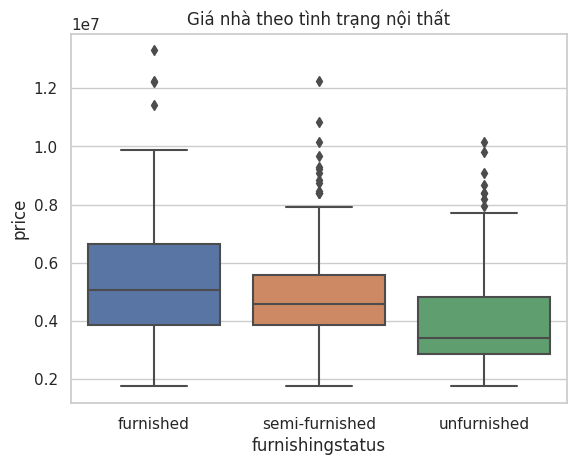

In [11]:
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title("Gi√° nh√† theo t√¨nh tr·∫°ng n·ªôi th·∫•t")




**Bi·ªÉu ƒë·ªì boxplot (bi·ªÉu ƒë·ªì h·ªôp)** th·ªÉ hi·ªán s·ª± ph√¢n b·ªë gi√° nh√† (price) theo t√¨nh tr·∫°ng n·ªôi th·∫•t (furnishingstatus) ‚Äî v√† ƒë√¢y l√† m·ªôt c√°ch r·∫•t tr·ª±c quan ƒë·ªÉ so s√°nh gi√° trung v·ªã, ƒë·ªô ph√¢n t√°n, v√† c√°c ngo·∫°i l·ªá c·ªßa t·ª´ng nh√≥m.

**Nh·∫≠n x√©t:**
1. Gi√° trung v·ªã (median):

* furnished c√≥ gi√° trung v·ªã cao nh·∫•t, t·ª©c nh√† c√≥ n·ªôi th·∫•t ƒë·∫ßy ƒë·ªß th∆∞·ªùng c√≥ gi√° cao h∆°n.
* Sau ƒë√≥ l√† semi-furnished, r·ªìi unfurnished (kh√¥ng n·ªôi th·∫•t) c√≥ gi√° trung v·ªã th·∫•p nh·∫•t.


‚ü∂ ƒêi·ªÅu n√†y ph√π h·ª£p v·ªõi k·ª≥ v·ªçng: nh√† c√†ng ƒë∆∞·ª£c trang b·ªã n·ªôi th·∫•t ƒë·∫ßy ƒë·ªß th√¨ th∆∞·ªùng c√≥ gi√° cao h∆°n.

2. ƒê·ªô ph√¢n t√°n (interquartile range - IQR):
* furnished c√≥ kho·∫£ng gi√° dao ƒë·ªông (IQR) t∆∞∆°ng ƒë·ªëi r·ªông.
* unfurnished l·∫°i c√≥ IQR h·∫πp h∆°n, cho th·∫•y gi√° th∆∞·ªùng ·ªïn ƒë·ªãnh h∆°n trong nh√≥m n√†y.

3. Ngo·∫°i l·ªá (outliers):
* C·∫£ 3 nh√≥m ƒë·ªÅu c√≥ nhi·ªÅu ƒëi·ªÉm ngo·∫°i l·ªá (d·∫•u ch·∫•m nh·ªè ph√≠a tr√™n h·ªôp), ƒë·∫∑c bi·ªát l√† c√°c cƒÉn c√≥ gi√° cao h∆°n m·ª©c b√¨nh th∆∞·ªùng.

* ƒêi·ªÅu n√†y ph·∫£n √°nh m·ªôt s·ªë cƒÉn c√≥ gi√° r·∫•t cao do v·ªã tr√≠, di·ªán t√≠ch, ho·∫∑c c√°c ƒë·∫∑c ƒëi·ªÉm ƒë·∫∑c bi·ªát kh√°c.

4. Ph√¢n b·ªë t·ªïng th·ªÉ:
* Kh√¥ng c√≥ nh√≥m n√†o ho√†n to√†n kh√¥ng c√≥ gi√° th·∫•p, nghƒ©a l√† t√¨nh tr·∫°ng n·ªôi th·∫•t kh√¥ng ph·∫£i y·∫øu t·ªë duy nh·∫•t quy·∫øt ƒë·ªãnh gi√°, nh∆∞ng n√≥ ·∫£nh h∆∞·ªüng r√µ r·ªát ƒë·∫øn m·ª©c gi√° trung b√¨nh v√† cao nh·∫•t.

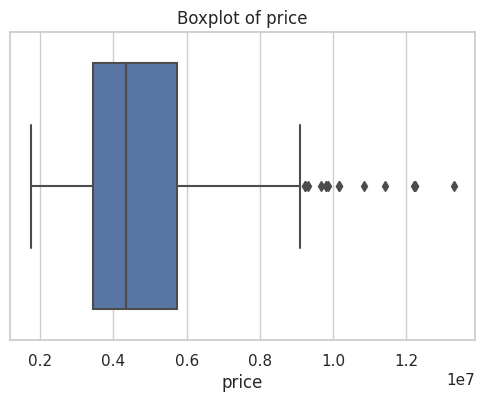

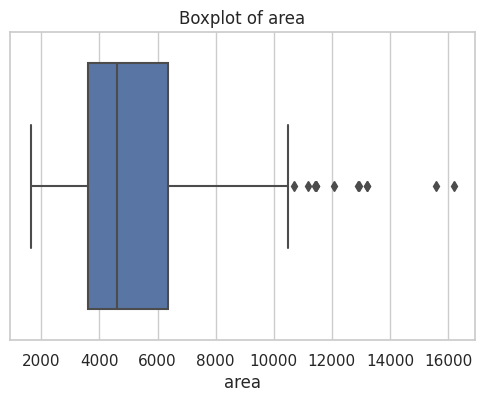

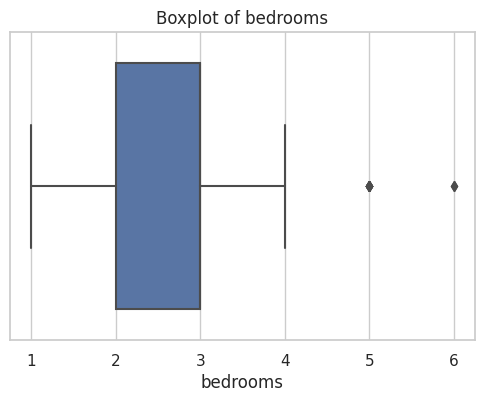

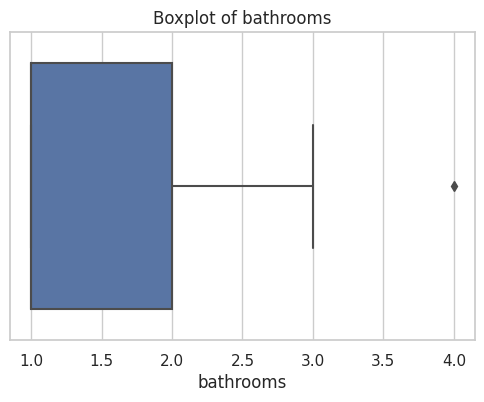

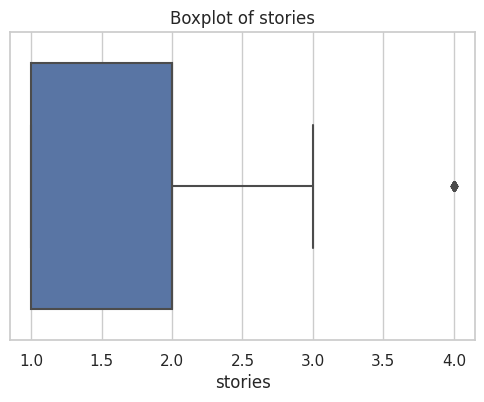

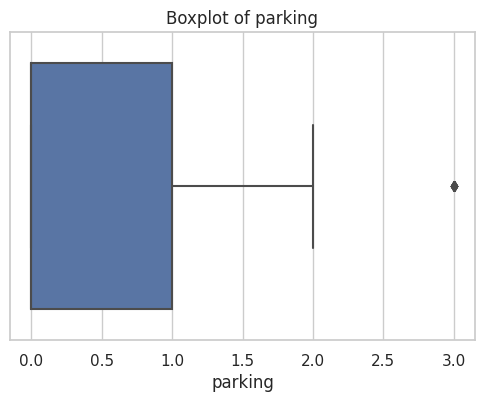

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

##  Ph√¢n b·ªë gi√° nh√†

Text(0.5, 1.0, 'Ph√¢n b·ªë gi√° nh√†')

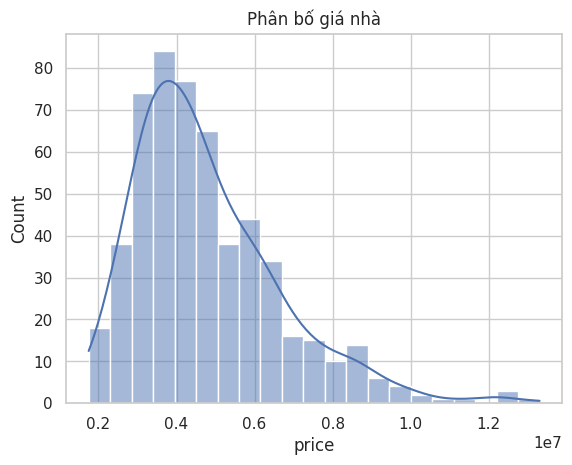

In [13]:
sns.histplot(df['price'], kde=True)
plt.title("Ph√¢n b·ªë gi√° nh√†")

1. D·∫°ng ph√¢n b·ªë:
* Ph√¢n b·ªë l·ªách ph·∫£i (right-skewed) ‚Äì t·ª©c l√† ph·∫ßn l·ªõn c√°c cƒÉn nh√† c√≥ gi√° th·∫•p h∆°n, v√† ch·ªâ c√≥ m·ªôt s·ªë √≠t cƒÉn nh√† c√≥ gi√° r·∫•t cao.
* Ph√¢n b·ªë kh√¥ng ƒë·ªëi x·ª©ng, ƒëu√¥i k√©o d√†i v·ªÅ b√™n ph·∫£i ‚ü∂ cho th·∫•y c√≥ nhi·ªÅu ngo·∫°i l·ªá (outliers) v·ªõi gi√° r·∫•t cao.

2. Gi√° ph·ªï bi·∫øn:
* Gi√° nh√† ph·ªï bi·∫øn nh·∫•t r∆°i v√†o kho·∫£ng 0.3 ƒë·∫øn 0.5 t·ª∑ (kho·∫£ng 3 tri·ªáu ƒë·∫øn 5 tri·ªáu n·∫øu d√πng ƒë∆°n v·ªã trong bi·ªÉu ƒë·ªì l√† 10‚Å∑).

* ƒê·ªânh histogram cho th·∫•y nh√≥m gi√° n√†y c√≥ t·∫ßn su·∫•t xu·∫•t hi·ªán cao nh·∫•t.

3. Ngo·∫°i l·ªá:
* M·ªôt s·ªë cƒÉn nh√† c√≥ gi√° cao t·ªõi h∆°n 1.2e7 (~12 tri·ªáu) ‚Äì tuy r·∫•t √≠t nh∆∞ng k√©o ƒëu√¥i ph√¢n ph·ªëi d√†i ra b√™n ph·∫£i, khi·∫øn trung b√¨nh c√≥ th·ªÉ cao h∆°n trung v·ªã.

4. ƒê∆∞·ªùng KDE (ƒë∆∞·ªùng cong m∆∞·ª£t):
* Gi√∫p th·∫•y ƒë∆∞·ª£c d·∫°ng ph√¢n ph·ªëi r√µ r√†ng h∆°n so v·ªõi c√°c c·ªôt histogram.

* Kh·∫≥ng ƒë·ªãnh l·∫°i r·∫±ng d·ªØ li·ªáu kh√¥ng ph√¢n b·ªë chu·∫©n (normal).

##  Hi·ªÉn th·ªã t·∫ßn su·∫•t c√°c gi√° tr·ªã ph√¢n lo·∫°i

Text(0.5, 1.0, 'T√¨nh tr·∫°ng n·ªôi th·∫•t')

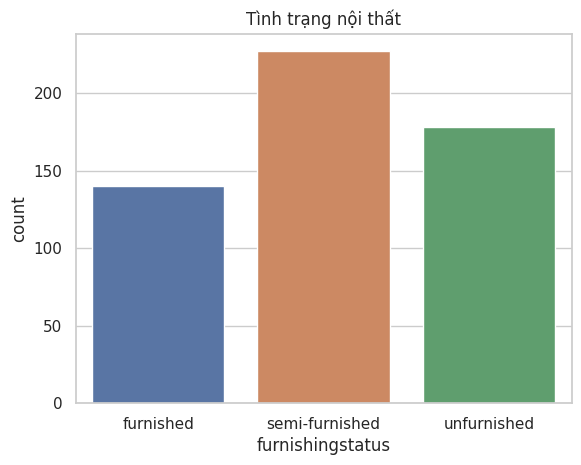

In [14]:
sns.countplot(x='furnishingstatus', data=df)
plt.title("T√¨nh tr·∫°ng n·ªôi th·∫•t")

1. Lo·∫°i ph·ªï bi·∫øn nh·∫•t:
* semi-furnished (n·ªôi th·∫•t b√°n ph·∫ßn) l√† lo·∫°i ph·ªï bi·∫øn nh·∫•t, v·ªõi s·ªë l∆∞·ª£ng nh√† cao nh·∫•t (h∆°n 220 cƒÉn).
2. C√°c lo·∫°i c√≤n l·∫°i:
* unfurnished (kh√¥ng c√≥ n·ªôi th·∫•t) ƒë·ª©ng th·ª© hai v·ªõi kho·∫£ng 175 cƒÉn.

* furnished (ƒë·∫ßy ƒë·ªß n·ªôi th·∫•t) c√≥ √≠t nh·∫•t, kho·∫£ng 140 cƒÉn.


##  Pairplot (Bi·ªÉu ƒë·ªì ma tr·∫≠n ph√¢n t√°n) . Gi√∫p kh√°m ph√° m·ªëi quan h·ªá gi·ªØa nhi·ªÅu bi·∫øn s·ªë c√πng l√∫c:


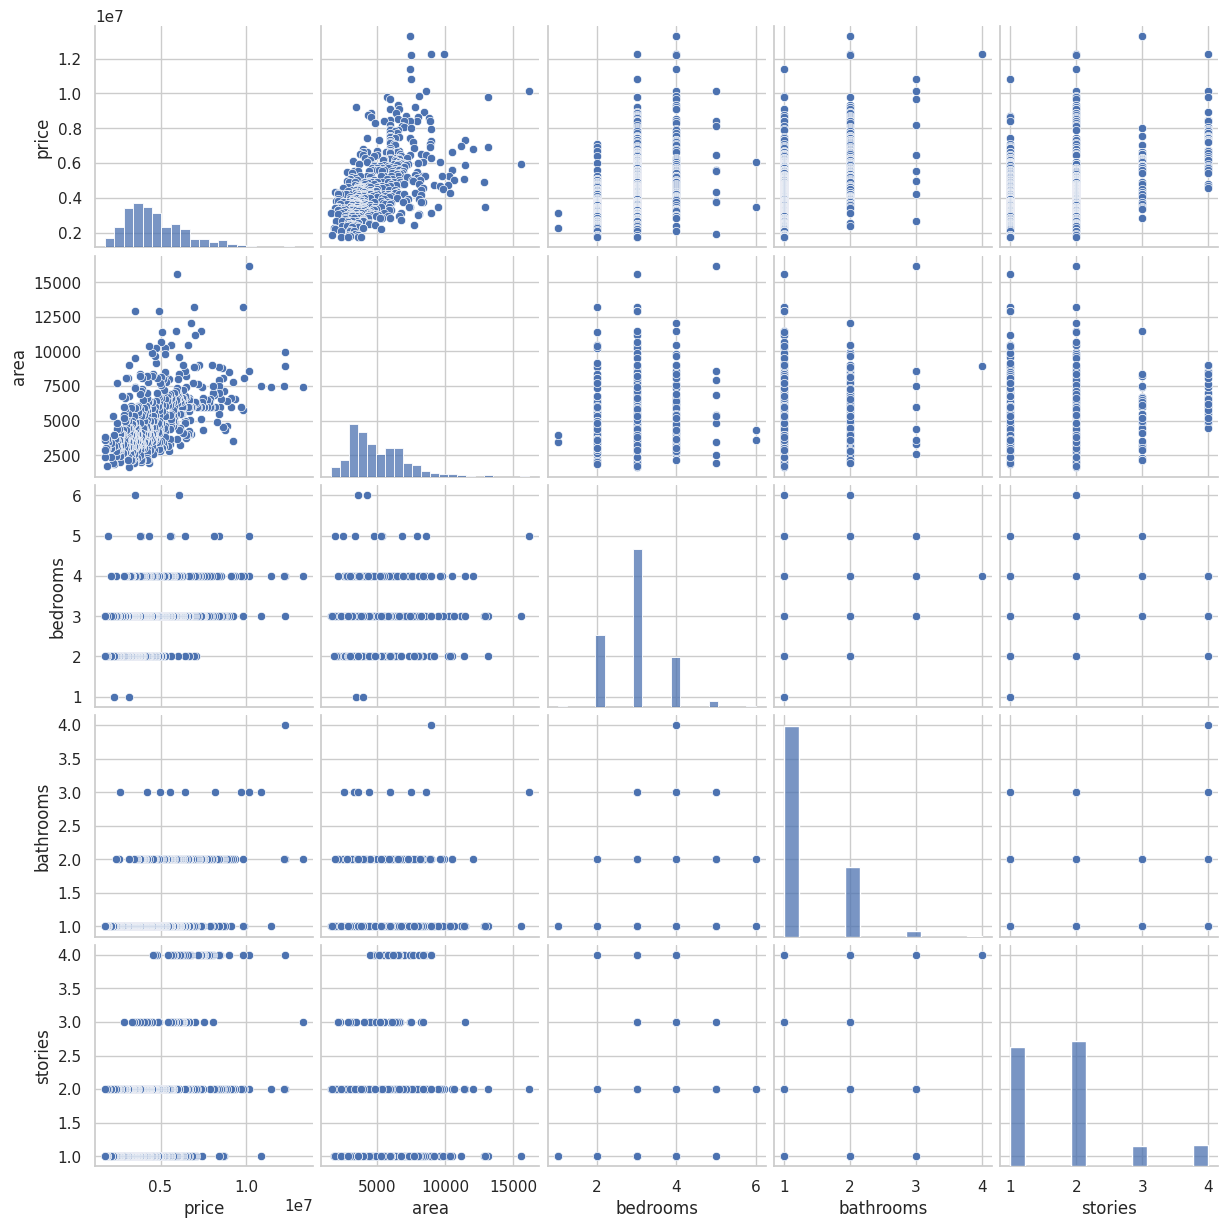

In [15]:
sns.pairplot(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories']])


## Heatmap (b·∫£n ƒë·ªì nhi·ªát) c·ªßa h·ªá s·ªë t∆∞∆°ng quan

Text(0.5, 1.0, 'Ma tr·∫≠n t∆∞∆°ng quan')

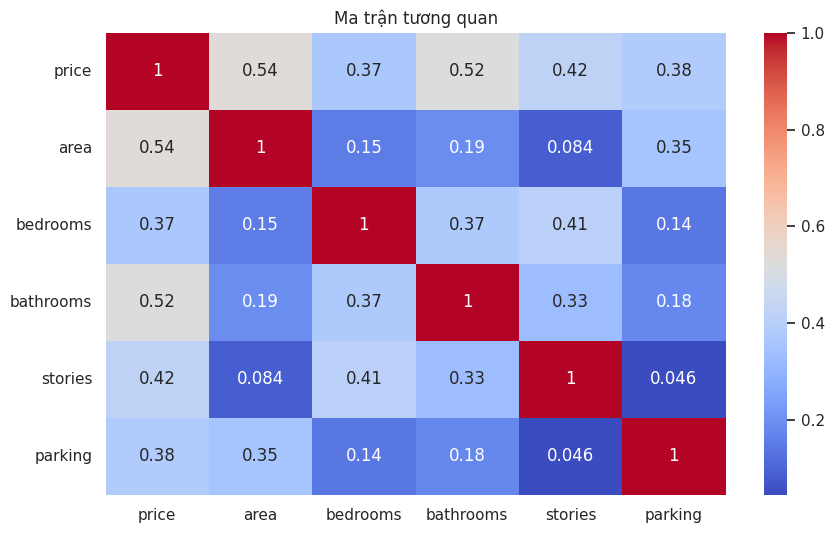

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Ma tr·∫≠n t∆∞∆°ng quan")

**Bi·∫øn m·ª•c ti√™u: price (gi√° nh√†)**

**T∆∞∆°ng quan cao nh·∫•t v·ªõi:**

area: 0.54 ‚ü∂ di·ªán t√≠ch nh√† ·∫£nh h∆∞·ªüng m·∫°nh nh·∫•t ƒë·∫øn gi√° nh√†.

bathrooms: 0.52 ‚ü∂ S·ªë ph√≤ng t·∫Øm c≈©ng ·∫£nh h∆∞·ªüng nhi·ªÅu, h·ª£p l√Ω v√¨ ti·ªán nghi c√†ng nhi·ªÅu gi√° c√†ng cao.

stories: 0.42 ‚ü∂ S·ªë t·∫ßng c√≥ ·∫£nh h∆∞·ªüng m·ª©c v·ª´a.

bedrooms: 0.37 ‚ü∂ Ph√≤ng ng·ªß c√≥ ·∫£nh h∆∞·ªüng th·∫•p h∆°n k·ª≥ v·ªçng.

parking: 0.38 ‚ü∂ C√≥ ch·ªó ƒë·∫≠u xe l√†m tƒÉng gi√° tr·ªã, nh∆∞ng kh√¥ng qu√° m·∫°nh.

**T∆∞∆°ng quan y·∫øu:**
area & stories: 0.084 ‚ü∂ Di·ªán t√≠ch v√† s·ªë t·∫ßng kh√¥ng ƒëi ƒë√¥i v·ªõi nhau.

parking & stories: 0.046 ‚ü∂ G·∫ßn nh∆∞ kh√¥ng li√™n quan.

K·∫øt lu·∫≠n: 
* Kh√¥ng c√≥ c·∫∑p bi·∫øn n√†o c√≥ t∆∞∆°ng quan r·∫•t cao (> 0.8) ‚ü∂ Kh√¥ng lo multicollinearity nghi√™m tr·ªçng n·∫øu d√πng c√°c m√¥ h√¨nh tuy·∫øn t√≠nh.
* price ph·ª• thu·ªôc nhi·ªÅu v√†o di·ªán t√≠ch, ph√≤ng t·∫Øm, v√† ph·∫ßn n√†o l√† t·∫ßng, ch·ªó ƒë·∫≠u xe.

* bedrooms t∆∞·ªüng ch·ª´ng quan tr·ªçng, nh∆∞ng h·ªá s·ªë t∆∞∆°ng quan v·ªõi price l·∫°i kh√° th·∫•p (0.37), cho th·∫•y ch·∫•t l∆∞·ª£ng v√† ti·ªán √≠ch c√≥ th·ªÉ quan tr·ªçng h∆°n s·ªë l∆∞·ª£ng.


##   Bi·ªÉu ƒë·ªì Regression plot (ƒë∆∞·ªùng h·ªìi quy). Ki·ªÉm tra m·ªëi t∆∞∆°ng quan c·ª• th·ªÉ:


Text(0.5, 1.0, 'M·ªëi quan h·ªá gi·ªØa di·ªán t√≠ch v√† gi√°')

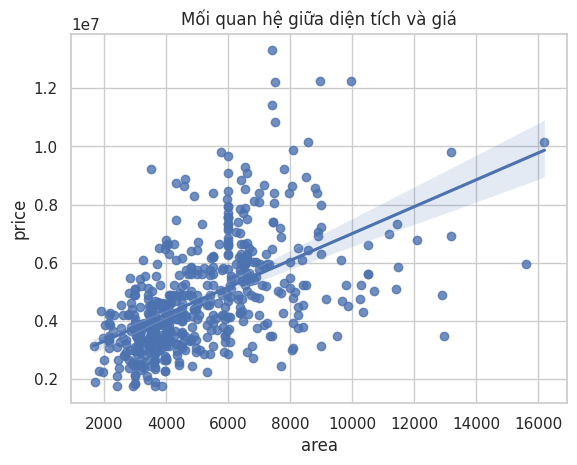

In [17]:
sns.regplot(x='area', y='price', data=df)
plt.title("M·ªëi quan h·ªá gi·ªØa di·ªán t√≠ch v√† gi√°")


Xu h∆∞·ªõng d∆∞∆°ng r√µ r·ªát: ƒê∆∞·ªùng h·ªìi quy c√≥ ƒë·ªô d·ªëc d∆∞∆°ng, cho th·∫•y di·ªán t√≠ch c√†ng l·ªõn th√¨ gi√° b·∫•t ƒë·ªông s·∫£n c√†ng cao ‚Äî ƒëi·ªÅu n√†y ph√π h·ª£p v·ªõi logic th·ªã tr∆∞·ªùng.

Ph√¢n t√°n d·ªØ li·ªáu: D·ªØ li·ªáu c√≥ s·ª± ph√¢n t√°n kh√° l·ªõn, ƒë·∫∑c bi·ªát ·ªü nh·ªØng di·ªán t√≠ch l·ªõn h∆°n, cho th·∫•y c√≥ nhi·ªÅu y·∫øu t·ªë kh√°c ngo√†i di·ªán t√≠ch ·∫£nh h∆∞·ªüng ƒë·∫øn gi√°, v√≠ d·ª• nh∆∞ v·ªã tr√≠, ti·ªán √≠ch, ph√°p l√Ω,...

M·ªôt s·ªë ƒëi·ªÉm ngo·∫°i lai (outliers):

* C√≥ m·ªôt s·ªë ƒëi·ªÉm c√≥ gi√° r·∫•t cao so v·ªõi ph·∫ßn l·ªõn d·ªØ li·ªáu c√≥ c√πng di·ªán t√≠ch.

* C√≥ th·ªÉ l√† bi·ªát th·ª±, nh√† m·∫∑t ti·ªÅn, ho·∫∑c v·ªã tr√≠ c·ª±c k·ª≥ ƒë·∫Øc ƒë·ªãa.

##  Ti·ªÅn x·ª≠ l√≠

# X·ª≠ l√≠ ngo·∫°i lai

In [18]:
import pandas as pd

# ƒê·ªçc d·ªØ li·ªáu
housing = pd.read_csv("/kaggle/input/housng-dataset/Housing.csv")
df = housing.copy()

# C√°c c·ªôt s·ªë c·∫ßn x·ª≠ l√Ω
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# ----üîπ 1. ƒê·∫øm s·ªë l∆∞·ª£ng ngo·∫°i lai TR∆Ø·ªöC khi x·ª≠ l√Ω (d√πng IQR) ----
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers_before = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                   (df[numeric_cols] > (Q3 + 1.5 * IQR)))

print("üîç S·ªë l∆∞·ª£ng ngo·∫°i lai tr∆∞·ªõc khi x·ª≠ l√Ω:")
print(outliers_before.sum())

# ----üîπ 2. X·ª≠ l√Ω ngo·∫°i lai b·∫±ng capping ----
df_capped = df.copy()
for col in numeric_cols:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]
    df_capped[col] = df_capped[col].clip(lower, upper)

# ----üîπ 3. ƒê·∫øm s·ªë l∆∞·ª£ng ngo·∫°i lai SAU khi x·ª≠ l√Ω ----
outliers_after = ((df_capped[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                  (df_capped[numeric_cols] > (Q3 + 1.5 * IQR)))

print("\n‚úÖ S·ªë l∆∞·ª£ng ngo·∫°i lai sau khi x·ª≠ l√Ω:")
print(outliers_after.sum())


üîç S·ªë l∆∞·ª£ng ngo·∫°i lai tr∆∞·ªõc khi x·ª≠ l√Ω:
price        15
area         12
bedrooms     12
bathrooms     1
stories      41
parking      12
dtype: int64

‚úÖ S·ªë l∆∞·ª£ng ngo·∫°i lai sau khi x·ª≠ l√Ω:
price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64


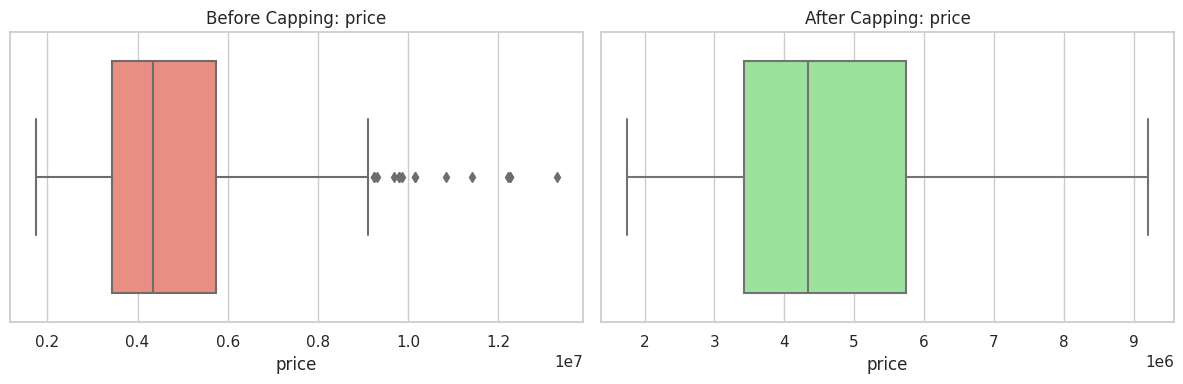

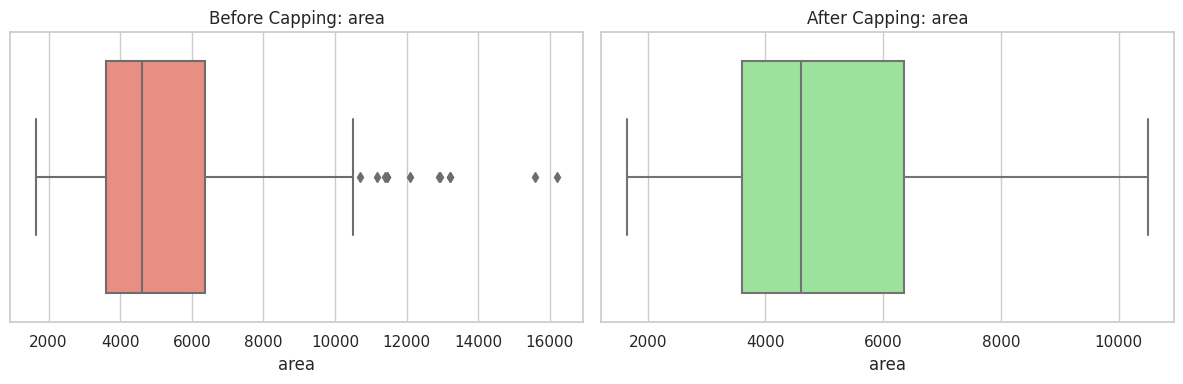

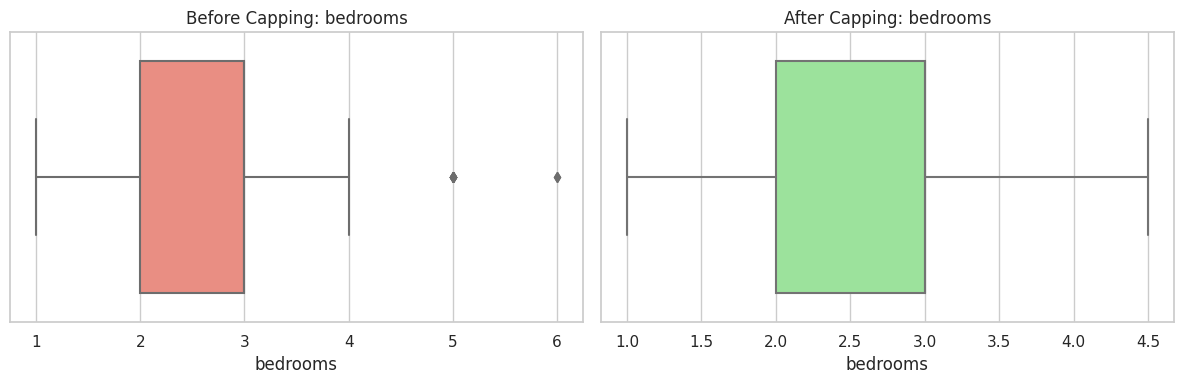

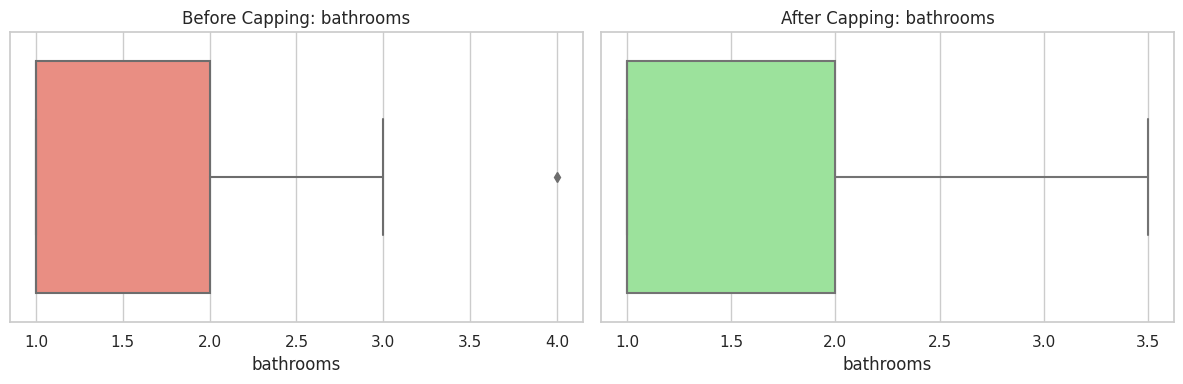

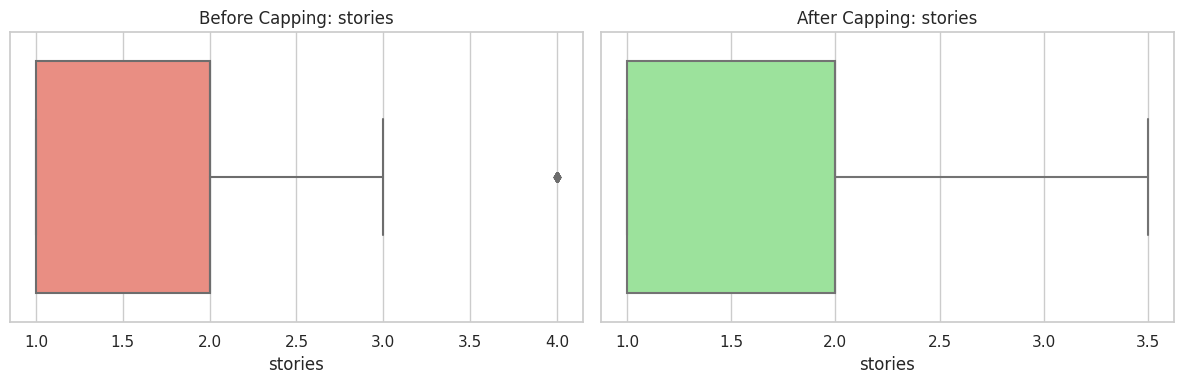

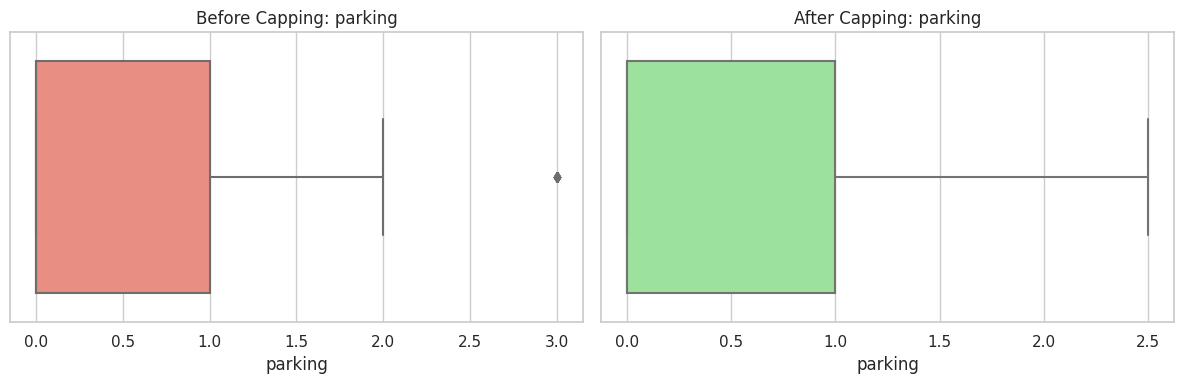

In [19]:
# ----üîπ V·∫Ω boxplot tr∆∞·ªõc v√† sau x·ª≠ l√Ω ----
for col in numeric_cols:
    fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
    
    # Boxplot tr∆∞·ªõc x·ª≠ l√Ω
    sns.boxplot(data=df, x=col, ax=axes[0], color='salmon')
    axes[0].set_title(f'Before Capping: {col}')
    
    # Boxplot sau x·ª≠ l√Ω
    sns.boxplot(data=df_capped, x=col, ax=axes[1], color='lightgreen')
    axes[1].set_title(f'After Capping: {col}')
    
    plt.tight_layout()
    plt.show()

* price:	    15 =>	C√≥ m·ªôt s·ªë ng√¥i nh√† c√≥ gi√° b·∫•t th∆∞·ªùng, c√≥ th·ªÉ l√† nh√† r·∫•t cao c·∫•p ho·∫∑c r·∫•t r·∫ª
* area:	    12=>	Di·ªán t√≠ch c√≥ th·ªÉ qu√° l·ªõn ho·∫∑c qu√° nh·ªè, g√¢y ·∫£nh h∆∞·ªüng ƒë·∫øn ph√¢n ph·ªëi
* bedrooms:	12=>	S·ªë ph√≤ng ng·ªß b·∫•t th∆∞·ªùng c√≥ th·ªÉ do bi·ªát th·ª± ho·∫∑c nh√† r·∫•t nh·ªè
* bathrooms:	1=>	Ngo·∫°i lai nh·∫π, √≠t ·∫£nh h∆∞·ªüng
* stories:	41=>	ƒê√¢y l√† c·ªôt c√≥ nhi·ªÅu ngo·∫°i lai nh·∫•t ‚Äì c√≥ th·ªÉ do s·ªë t·∫ßng v∆∞·ª£t chu·∫©n
* parking:	12=>	C√≥ nh·ªØng nh√† c√≥ qu√° nhi·ªÅu ch·ªó ƒë·∫≠u xe ‚Äì kh√¥ng ph·ªï bi·∫øn

Tr∆∞·ªõc x·ª≠ l√Ω: C√°c ngo·∫°i lai n√†y n·∫øu kh√¥ng x·ª≠ l√Ω s·∫Ω ·∫£nh h∆∞·ªüng ƒë·∫øn:

* K·∫øt qu·∫£ hu·∫•n luy·ªán m√¥ h√¨nh (h·ªçc l·ªách theo c√°c gi√° tr·ªã b·∫•t th∆∞·ªùng).
* Hi·ªáu su·∫•t c·ªßa c√°c m√¥ h√¨nh nh·∫°y v·ªõi ph√¢n ph·ªëi (nh∆∞ h·ªìi quy tuy·∫øn t√≠nh, KNN...).

Sau khi x·ª≠ l√≠, to√†n b·ªô ngo·∫°i lai ƒë√£ ƒë∆∞·ª£c x·ª≠ l√Ω g·ªçn g√†ng

Capping (gi·ªõi h·∫°n gi√° tr·ªã v∆∞·ª£t qu√° ng∆∞·ª°ng) gi√∫p:
* Gi·ªØ l·∫°i to√†n b·ªô m·∫´u d·ªØ li·ªáu g·ªëc (kh√¥ng lo·∫°i b·ªè).
* Gi·∫£m ·∫£nh h∆∞·ªüng ti√™u c·ª±c c·ªßa gi√° tr·ªã c·ª±c ƒëoan ƒë·∫øn m√¥ h√¨nh.
* ·ªîn ƒë·ªãnh ph√¢n ph·ªëi c·ªßa c√°c ƒë·∫∑c tr∆∞ng, gi√∫p m√¥ h√¨nh h·ªçc t·ªët h∆°n.

T·ªïng k·∫øt nh·∫≠n x√©t
* Vi·ªác x·ª≠ l√Ω ngo·∫°i lai b·∫±ng ph∆∞∆°ng ph√°p IQR Capping l√† h·ª£p l√Ω v√† hi·ªáu qu·∫£.
* D·ªØ li·ªáu sau x·ª≠ l√Ω kh√¥ng c√≤n ƒëi·ªÉm b·∫•t th∆∞·ªùng, gi√∫p ƒë·∫£m b·∫£o ch·∫•t l∆∞·ª£ng cho c√°c b∆∞·ªõc ti·ªÅn x·ª≠ l√Ω ti·∫øp theo nh∆∞ chu·∫©n h√≥a, hu·∫•n luy·ªán m√¥ h√¨nh h·ªçc m√°y.
* Ph∆∞∆°ng ph√°p n√†y b·∫£o to√†n th√¥ng tin, tr√°nh m·∫•t m·∫´u d·ªØ li·ªáu nh∆∞ khi lo·∫°i b·ªè ho√†n to√†n.

# Gi·∫£m chi·ªÅu

D√πng PCA ƒë·ªÉ gi·∫£m chi·ªÅu

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

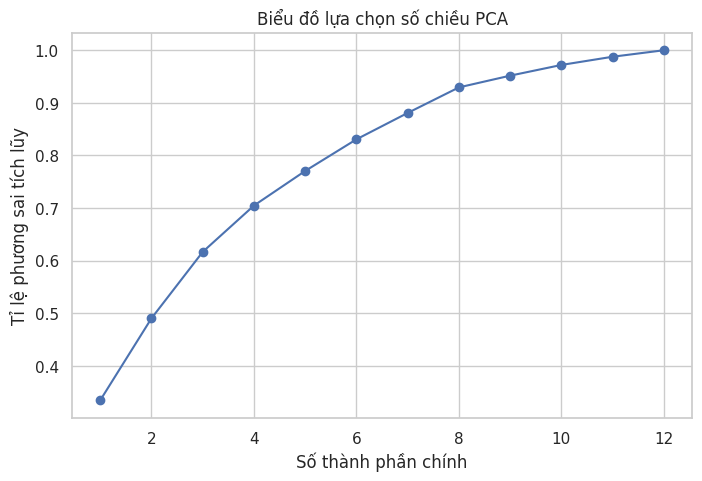

In [21]:


# B∆∞·ªõc 1: X√°c ƒë·ªãnh c·ªôt m·ª•c ti√™u
target_col = df_capped.columns[0]  # c·ªôt 'price'

# B∆∞·ªõc 2: X√°c ƒë·ªãnh c·ªôt li√™n t·ª•c v√† ph√¢n lo·∫°i
continuous_cols = df_capped.select_dtypes(include=['float64', 'int64']).columns.drop(target_col, errors='ignore')
categorical_cols = df_capped.select_dtypes(include=['object']).columns

# B∆∞·ªõc 3: Chu·∫©n h√≥a c√°c c·ªôt li√™n t·ª•c
scaler = MinMaxScaler()
df_capped[continuous_cols] = scaler.fit_transform(df_capped[continuous_cols])

# B∆∞·ªõc 4: Label encode c√°c c·ªôt ph√¢n lo·∫°i (yes/no ‚Üí 1/0)
le = LabelEncoder()
for col in categorical_cols:
    df_capped[col] = le.fit_transform(df_capped[col])


# B∆∞·ªõc 5: T√°ch X, y
X = df_capped.drop(columns=[target_col])
y = df_capped[target_col]

# B∆∞·ªõc 6: PCA - Xem bi·ªÉu ƒë·ªì ph∆∞∆°ng sai t√≠ch l≈©y
pca = PCA()
X_pca_full = pca.fit_transform(X)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('S·ªë th√†nh ph·∫ßn ch√≠nh')
plt.ylabel('T·ªâ l·ªá ph∆∞∆°ng sai t√≠ch l≈©y')
plt.title('Bi·ªÉu ƒë·ªì l·ª±a ch·ªçn s·ªë chi·ªÅu PCA')
plt.grid(True)
plt.show()

# B∆∞·ªõc 7: Gi·∫£m chi·ªÅu b·∫±ng PCA v·ªõi s·ªë chi·ªÅu gi·ªØ l·∫°i (c√≤n l·∫°i 5 chi·ªÅu)
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X)


* Tr·ª•c ho√†nh: S·ªë th√†nh ph·∫ßn ch√≠nh ƒë∆∞·ª£c ch·ªçn (s·ªë chi·ªÅu sau khi gi·∫£m).
* Tr·ª•c tung: T·ªâ l·ªá ph∆∞∆°ng sai t√≠ch l≈©y ‚Äì th·ªÉ hi·ªán l∆∞·ª£ng th√¥ng tin ƒë∆∞·ª£c gi·ªØ l·∫°i.

Nh·∫≠n x√©t v·ªÅ vi·ªác √°p d·ª•ng PCA
1. PCA hi·ªáu qu·∫£ trong gi·∫£m chi·ªÅu
ƒê·ªÉ ƒë·∫°t 90% ph∆∞∆°ng sai t√≠ch l≈©y, b·∫°n ch·ªâ c·∫ßn kho·∫£ng 8 th√†nh ph·∫ßn ch√≠nh.

D·ªØ li·ªáu g·ªëc c√≥ 12 ƒë·∫∑c tr∆∞ng, v·∫≠y PCA gi√∫p b·∫°n gi·∫£m t·ª´ 12 ‚Üí 8 chi·ªÅu (gi·∫£m kho·∫£ng 33%).

2. T·ªëc ƒë·ªô h·ªôi t·ª• t·ªët
Ph∆∞∆°ng sai tƒÉng d·∫ßn ƒë·ªÅu qua c√°c th√†nh ph·∫ßn ƒë·∫ßu ti√™n ‚Üí c√°c th√†nh ph·∫ßn ƒë·∫ßu ch·ª©a ph·∫ßn l·ªõn th√¥ng tin.

V√≠ d·ª•:

* 4 th√†nh ph·∫ßn ƒë·∫ßu gi·ªØ ƒë∆∞·ª£c kho·∫£ng 60% th√¥ng tin.

* 6 th√†nh ph·∫ßn ƒë·∫ßu gi·ªØ ƒë∆∞·ª£c kho·∫£ng 78‚Äì80% th√¥ng tin.

3. Kh√¥ng c√≥ ‚Äúelbow‚Äù r√µ r√†ng
ƒê·ªì th·ªã kh√¥ng c√≥ g√≥c g√£y m·∫°nh (elbow) ‚Üí kh√¥ng c√≥ ng∆∞·ª°ng r√µ r√†ng m√† sau ƒë√≥ ph∆∞∆°ng sai tƒÉng ch·∫≠m l·∫°i ƒë√°ng k·ªÉ.

Tuy nhi√™n, sau th√†nh ph·∫ßn th·ª© 8, ƒë∆∞·ªùng cong b·∫Øt ƒë·∫ßu ti·ªám c·∫≠n 1.0, t·ª©c l√† c√°c th√†nh ph·∫ßn sau th√™m r·∫•t √≠t th√¥ng tin ‚Üí c√≥ th·ªÉ b·ªè qua.

K·∫øt lu·∫≠n

Vi·ªác ch·ªçn √°p d·ª•ng PCA(n_components=0.9) t∆∞∆°ng ƒë∆∞∆°ng v·ªõi ch·ªçn  8 th√†nh ph·∫ßn ch√≠nh:
* Gi·∫£m chi·ªÅu ƒë√°ng k·ªÉ (12 ‚Üí 8).
* Gi·ªØ l·∫°i ƒë∆∞·ª£c 90% th√¥ng tin, r·∫•t ph√π h·ª£p ƒë·ªÉ d√πng l√†m input cho c√°c m√¥ h√¨nh h·ªçc m√°y.

K·∫øt h·ª£p v·ªõi chu·∫©n h√≥a + label encoding tr∆∞·ªõc ƒë√≥ s·∫Ω gi√∫p m√¥ h√¨nh h·ªçc hi·ªáu qu·∫£ h∆°n, tr√°nh overfitting v√† c·∫£i thi·ªán t·ªëc ƒë·ªô hu·∫•n luy·ªán.

In [22]:
# G·ªôp l·∫°i X_pca v√† y th√†nh m·ªôt DataFrame m·ªõi
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca[target_col] = y.values  # Th√™m c·ªôt m·ª•c ti√™u tr·ªü l·∫°i

# Xu·∫•t ra file CSV
df_pca.to_csv("housing_pca_processed.csv", index=False)
